In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("custom_dataset.csv")

In [3]:
X = data[['feature_1', 'feature_2']].to_numpy()
y = data['target'].to_numpy()

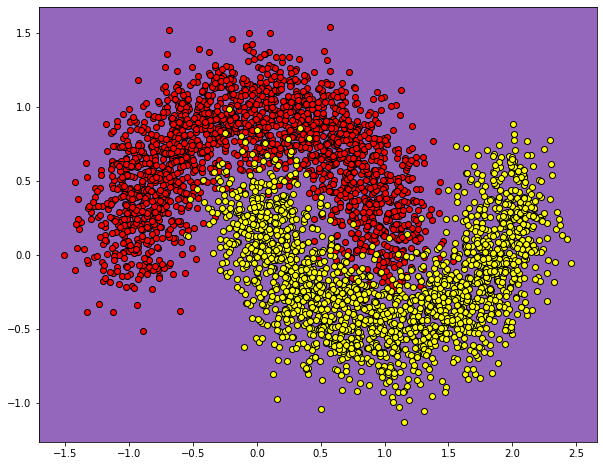

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.set_facecolor('tab:purple')
colors = {0:'red', 1:'yellow'}

for key, value in colors.items():    
    ax.scatter(X[y==key, 0],X[y==key, 1], c=value, label=key, edgecolors='black')

plt.show()

# Без обработки

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear')
model.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

predicted = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 1000)

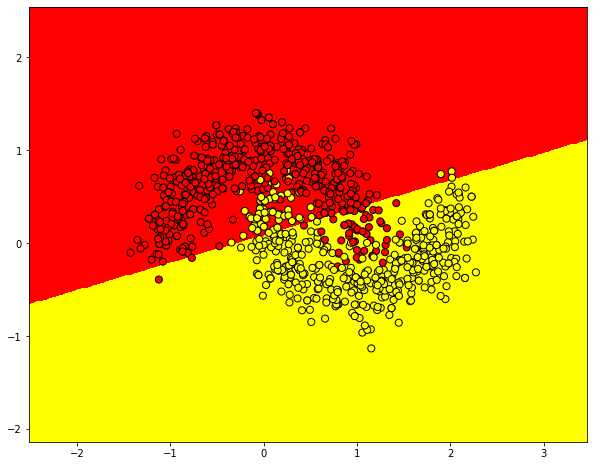

In [6]:
plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn', shading='auto')
plt.scatter(X[random_indxs, 0], X[random_indxs, 1], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black')

# После обработки фич (полином)

In [7]:
from sklearn.preprocessing import PolynomialFeatures

pol_degree = 3

# Преобразуем фичи под полином 3 степени
X_polynom = PolynomialFeatures(degree=pol_degree).fit_transform(X)
model_svm = SVC(kernel='linear')
model_svm.fit(X_polynom, y)

x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=pol_degree).fit_transform(xxyy)

predicted = model_svm.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 1000)

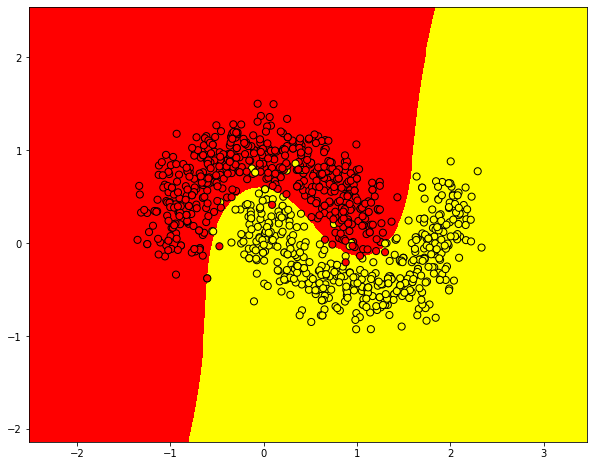

In [8]:
plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn', shading='auto')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black')

In [9]:
margin = 1 / np.sqrt(np.sum(model_svm.coef_ ** 2))
print("Ширина разделающей полосы = ", 2 * margin)

Ширина разделающей полосы =  0.19117848821938835


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_svm.fit(X_train_polynom, y_train)

X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_svm.predict(np.c_[X_test_polynom])

accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность SVM: ", accuracy)

Точность SVM:  0.9619140625


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures

X_polynom = PolynomialFeatures(degree=3).fit_transform(X)
model_knn = KNeighborsClassifier()
model_knn.fit(X_polynom, y)

x_min, x_max = X_polynom[:, 1].min() - 1, X_polynom[:, 1].max() + 1
y_min, y_max = X_polynom[:, 2].min() - 1, X_polynom[:, 2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
xxyy = np.array([xx.ravel(), yy.ravel()]).transpose()
xxr = PolynomialFeatures(degree=3).fit_transform(xxyy)

predicted = model_knn.predict(np.c_[xxr]).reshape(xx.shape)

random_indxs = np.random.randint(0, X.shape[0], 200)

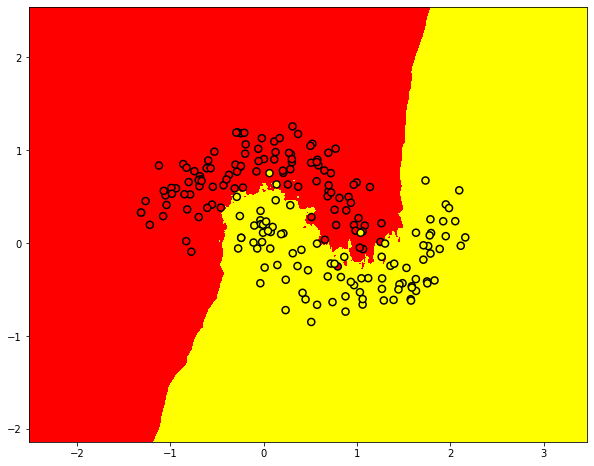

In [12]:
plt.rcParams['figure.figsize'] = (10,8)
plt.pcolormesh(xx, yy, predicted, cmap='autumn', shading='auto')
plt.scatter(X_polynom[random_indxs, 1], X_polynom[random_indxs, 2], 
            c=y[random_indxs], s=50, cmap='autumn', edgecolors='black', linewidth=1.5)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train_polynom = PolynomialFeatures(degree=3).fit_transform(X_train)
model_knn.fit(X_train_polynom, y_train)

X_test_polynom = PolynomialFeatures(degree=3).fit_transform(X_test)
predict = model_knn.predict(np.c_[X_test_polynom])

accuracy = np.sum(y_test == predict) / len(y_test)
print("Точность KNN: ", accuracy)

Точность KNN:  0.9674556213017751
